# Demo: Single Curvelet

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable

from curvelops import FDCT2D

In [2]:
def create_colorbar(im, ax):
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    cb = ax.get_figure().colorbar(im, cax=cax, orientation="vertical")
    return cax, cb

### Setup

In [3]:
m = 512
n = 512
x = np.zeros((m, n))
DCT = FDCT2D(x.shape)

### Curvelet Domain

In [4]:
y = DCT * x

# Convert to a curvelet struct indexed by
# [scale, wedge (angle), x, y]
y_reshape = DCT.struct(y)

In [5]:
# Select single curvelet
s = 4
w = 0
a, b = y_reshape[s][w].shape
normalization = np.sqrt(y_reshape[s][w].size)
y_reshape[s][w][a // 2, b // 2] = 1 * normalization
y_reshape[s][w + len(y_reshape[s]) // 2][a // 2, b // 2] = -1j * normalization

y = DCT.vect(y_reshape)

In [6]:
# Perform adjoint transform and reshape
x = DCT.H @ y

In [7]:
# F-K domain
x_fk = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(x), norm="ortho"))

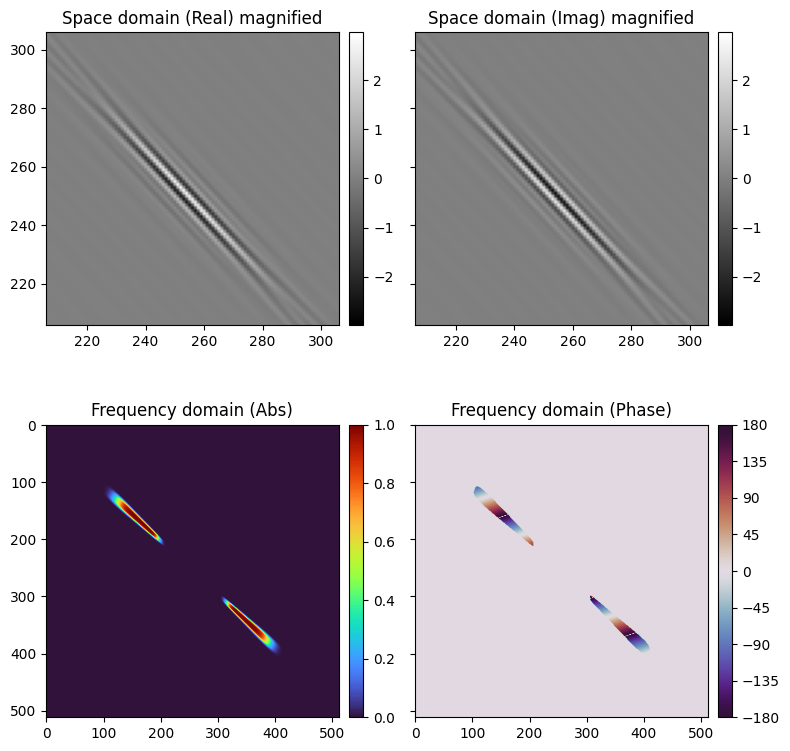

In [16]:
# Visualize
vmin, vmax = 0.8 * np.array([-1, 1]) * np.abs(np.max(x))
fig, ax = plt.subplots(2, 2, figsize=(8, 8), sharex="row", sharey="row")

im = ax[0, 0].imshow(x.real.T, cmap="gray", vmin=vmin, vmax=vmax)
create_colorbar(im, ax[0, 0])

im = ax[0, 1].imshow(x.imag.T, cmap="gray", vmin=vmin, vmax=vmax)
create_colorbar(im, ax[0, 1])

im = ax[1, 0].imshow(np.abs(x_fk).T, cmap="turbo", vmin=0)
create_colorbar(im, ax[1, 0])

mask = np.abs(x_fk) > 0.01 * np.abs(x_fk).max()
im = ax[1, 1].imshow(
    (mask * np.angle(x_fk, deg=True)).T,
    cmap="twilight_shifted",
    vmin=-180,
    vmax=180,
)
cax, cb = create_colorbar(im, ax[1, 1])
cax.get_yaxis().set_major_locator(MultipleLocator(45))


ax[0, 0].set(
    xlim=(m // 2 - 50, m // 2 + 50),
    ylim=(n // 2 - 50, n // 2 + 50),
    title="Space domain (Real) magnified",
)
ax[0, 1].set(title="Space domain (Imag) magnified")
ax[1, 0].set(title="Frequency domain (Abs)")
ax[1, 1].set(title="Frequency domain (Phase)")
fig.tight_layout()